In [13]:
#https://github.com/hmlanden/Pyber/blob/master/Pyber.ipynb
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("city_data.csv")
ride_df = pd.read_csv("ride_data.csv")
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, on="city", how="left")
# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

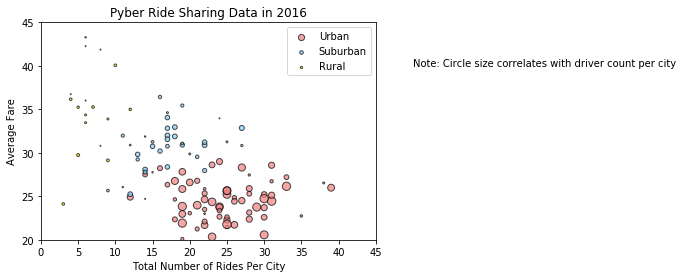

In [16]:
# Obtain the x and y coordinates for each of the three city types
urban = city_ride_df.loc[city_ride_df['type']=='Urban']
urban_rides = urban.groupby(by='city')['ride_id'].count()
urban_fare = urban.groupby(by='city')['fare'].mean()
urban_driver = urban.groupby(by='city')['driver_count'].mean()

suburban = city_ride_df.loc[city_ride_df['type']=='Suburban']
suburban_rides = suburban.groupby(by='city')['ride_id'].count()
suburban_fare = suburban.groupby(by='city')['fare'].mean()
suburban_driver = suburban.groupby(by='city')['driver_count'].mean()


rural = city_ride_df.loc[city_ride_df['type']=='Rural']
rural_rides = rural.groupby(by='city')['ride_id'].count()
rural_fare = rural.groupby(by='city')['fare'].mean()
rural_driver = rural.groupby(by='city')['driver_count'].mean()


# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_fare, marker="o", c='lightcoral', edgecolors="black", s=urban_driver, label="Urban", alpha=0.7)
plt.scatter(suburban_rides, suburban_fare, marker="o", c='lightskyblue', edgecolors="black", s=suburban_driver, label="Suburban", alpha=0.7)
plt.scatter(rural_rides, rural_fare, marker="o", c='gold', edgecolors="black", s=rural_driver, label="Rural", alpha=0.7)

# Incorporate the other graph properties
plt.ylim(20,45)
plt.xlim(0,45)
plt.title("Pyber Ride Sharing Data in 2016")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare")

# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(50, 40,"Note: Circle size correlates with driver count per city")

# Save Figure
plt.savefig("scatterplot.png")

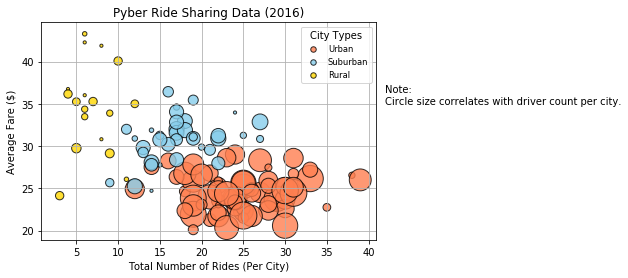

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

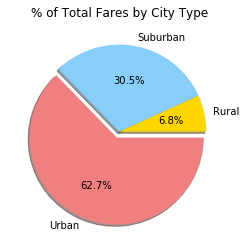

In [17]:
# Calculate Type Percents
city_pie_fare = city_ride_df.groupby(["type"])["fare"].sum()
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .075)
# Build Pie Chart
plt.pie(city_pie_fare, explode=explode, labels = city_pie_fare.index, autopct="%1.1f%%", colors=colors, shadow=True)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("pie_by_city_type.png")

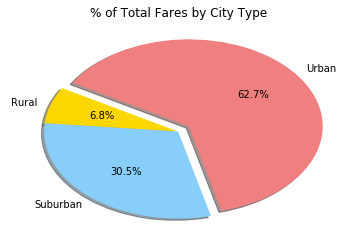

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

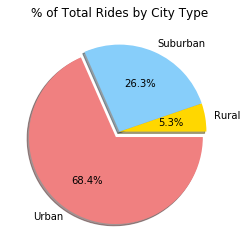

In [18]:
# Calculate Ride Percents
city_pie_ride = city_ride_df.groupby(["type"])["ride_id"].count()
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .075)
# Build Pie Chart
plt.pie(city_pie_ride, explode=explode, labels = city_pie_fare.index, autopct="%1.1f%%", colors=colors, shadow=True)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("pie_by_ride_type.png")

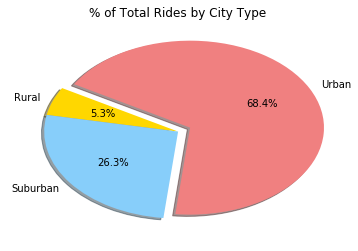

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

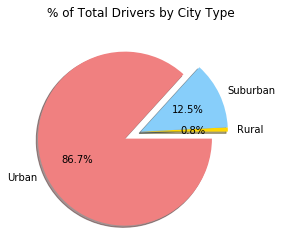

In [19]:
# Calculate Driver Percents
city_pie_drive = city_ride_df.groupby(["type"])["driver_count"].sum()
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .2)
# Build Pie Charts
plt.pie(city_pie_drive, explode=explode, labels = city_pie_fare.index, autopct="%1.1f%%", colors=colors, shadow=True)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("pie_by_drivers.png")

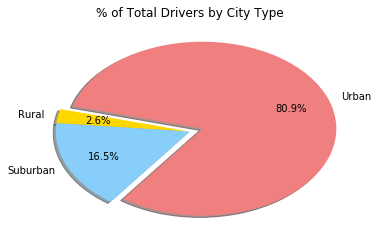

In [6]:
# Show Figure
plt.show()